In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Loading and exploring data

In [3]:
df_train = pd.read_csv(r'C:\Users\rohit\Videos\movies\Project\Paitients_Files_Train.csv')
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
df_train['sepsis_encoded'] = df_train['Sepssis'].map({'Positive':1, 'Negative': 0})
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,sepsis_encoded
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,1
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,0
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,1
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,0
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,1


In [5]:
df_train = df_train.drop(['ID', 'Sepssis'], axis='columns')
df_train.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,sepsis_encoded
0,6,148,72,35,0,33.6,0.627,50,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,1,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [6]:
df_train.describe(include='all')

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,sepsis_encoded
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144,0.347245
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447,0.476492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\Users\rohit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


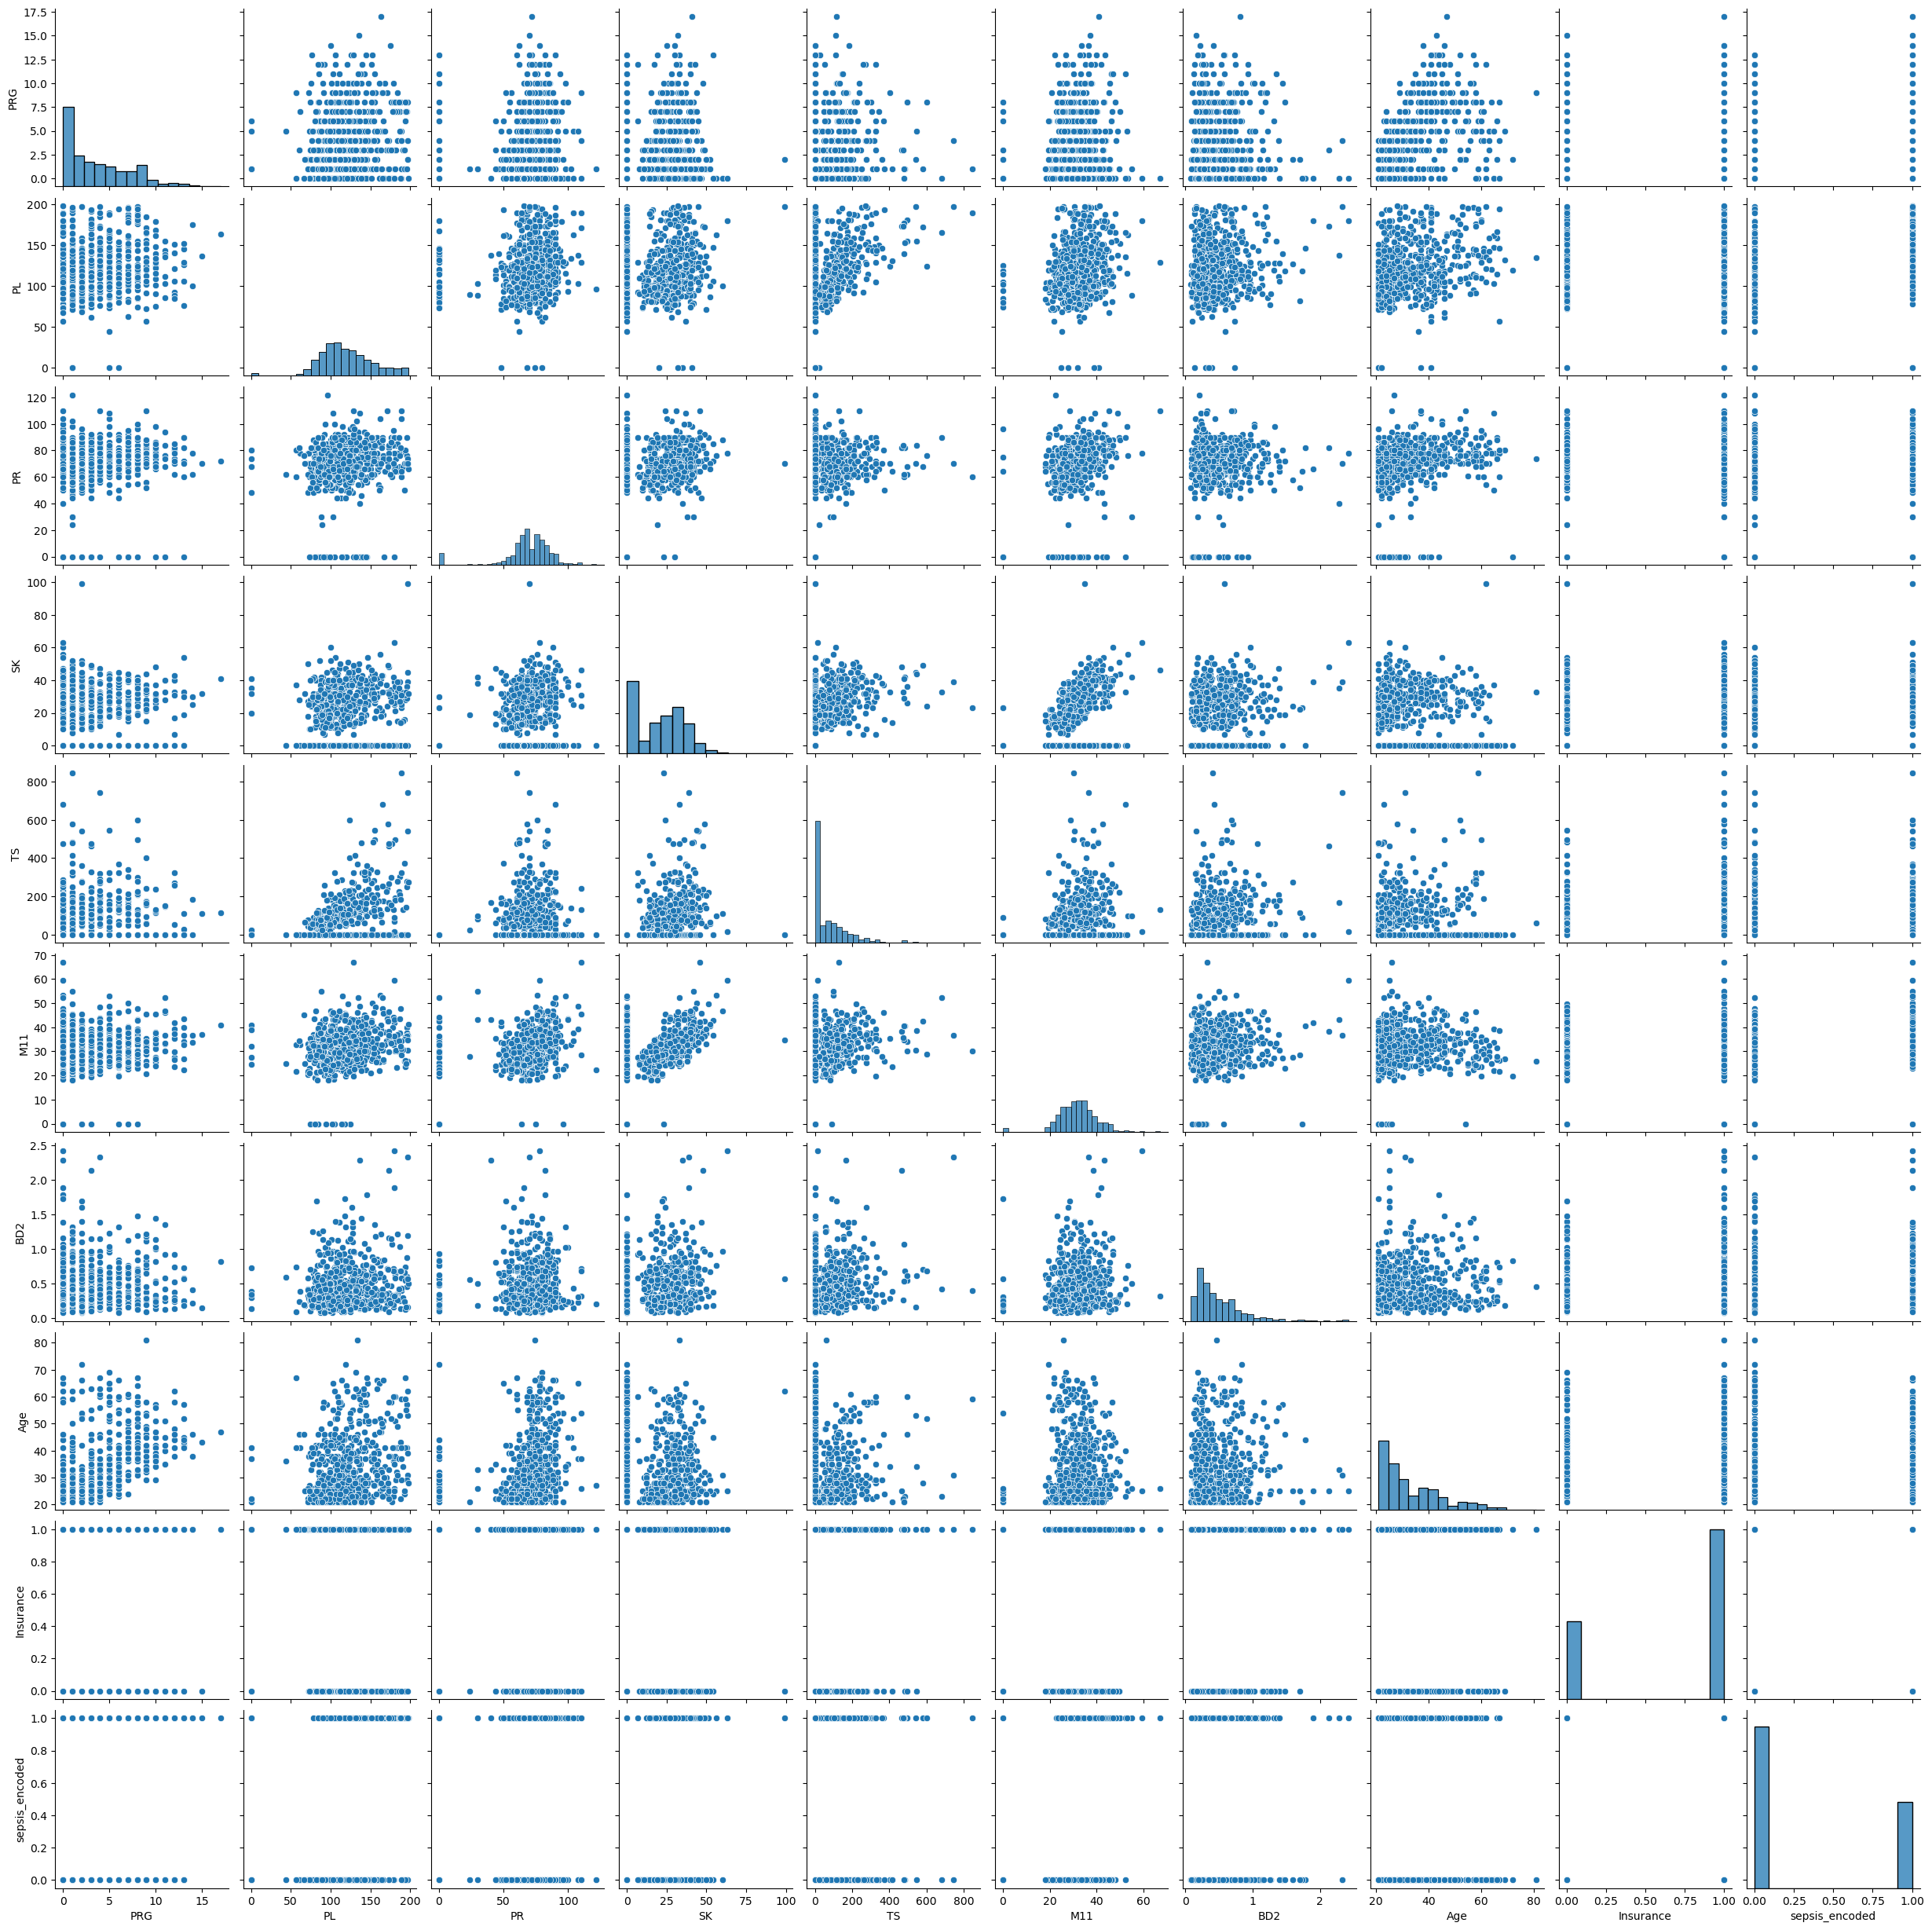

In [8]:
sns.pairplot(df_train)

<Axes: >

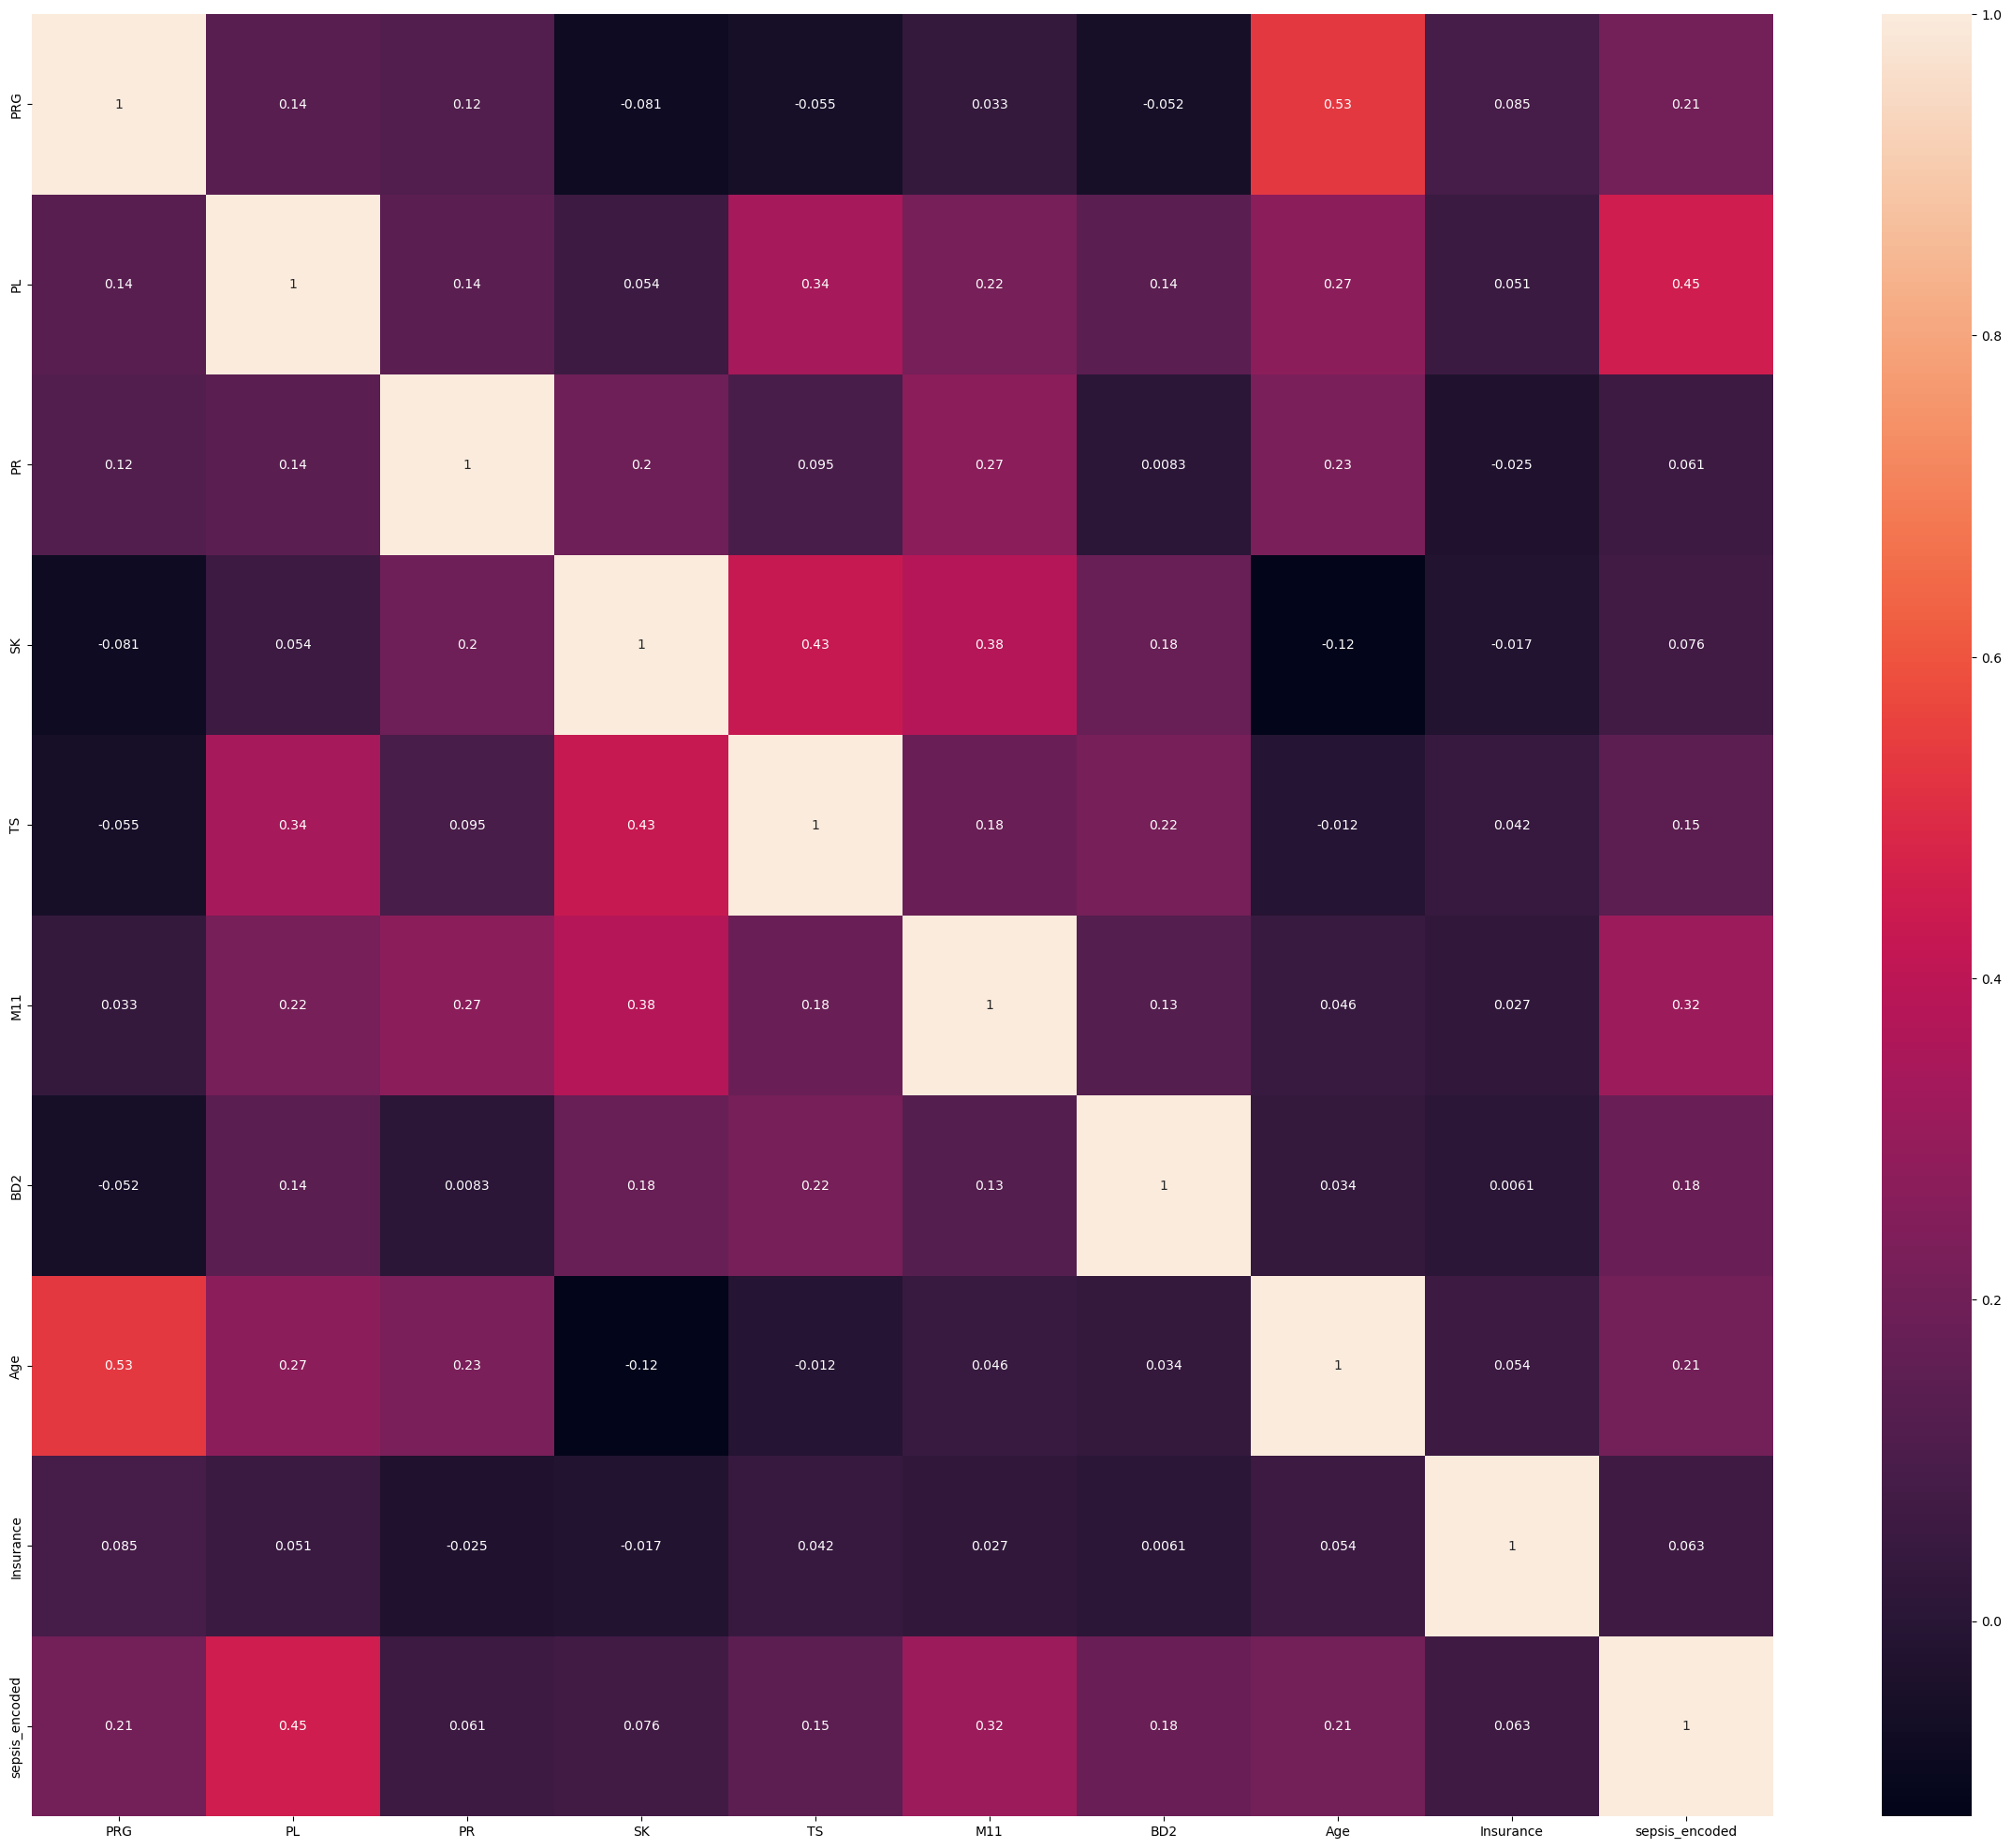

In [9]:
plt.figure(figsize=(30,25))
sns.heatmap(df_train.corr(), annot=True)

**From the pairplot and heat map it can be seen that there is certain degree of correlation between PRG, PL, TS, M11, BD2 and Age with sepsis**

# 2. Preparation of data for machine learning

In [10]:
X = df_train.drop('sepsis_encoded', axis='columns')
y = df_train['sepsis_encoded']

In [11]:
y.value_counts()

sepsis_encoded
0    391
1    208
Name: count, dtype: int64

**Note that the data is unbalanced, whereby the non-sepsis outcome is approximately double the sepsis outcome**

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2023)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((479, 9), (120, 9), (479,), (120,))

In [14]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([0.76517572, 1.44277108])

In [15]:
class_weight_dict = {}
for idx, weight in enumerate(class_weights):
    class_weight_dict[idx] = weight
class_weight_dict

{0: 0.7651757188498403, 1: 1.4427710843373494}

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
!pip install xgboost

# 3. Model comparison

In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [20]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000000000, class_weight=class_weight_dict),
    'SGD Classifier': SGDClassifier(class_weight=class_weight_dict),
    'Random Forest': RandomForestClassifier(class_weight=class_weight_dict),
    'Gradient Boosting': GradientBoostingClassifier(),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'KNeighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=10000000),
    'XGB': XGBClassifier()
}
models

{'Logistic Regression': LogisticRegression(class_weight={0: 0.7651757188498403, 1: 1.4427710843373494},
                    max_iter=10000000000),
 'SGD Classifier': SGDClassifier(class_weight={0: 0.7651757188498403, 1: 1.4427710843373494}),
 'Random Forest': RandomForestClassifier(class_weight={0: 0.7651757188498403,
                                      1: 1.4427710843373494}),
 'Gradient Boosting': GradientBoostingClassifier(),
 'GaussianNB': GaussianNB(),
 'MultinomialNB': MultinomialNB(),
 'KNeighbors': KNeighborsClassifier(),
 'Neural Network': MLPClassifier(max_iter=10000000),
 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_cons

In [21]:
model_names = []
model_average_scores = []
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train)
    model_names.append(model_name)
    model_average_scores.append(scores.mean())
    print(f'Scoring completed for {model_name}')

Scoring completed for Logistic Regression
Scoring completed for SGD Classifier
Scoring completed for Random Forest
Scoring completed for Gradient Boosting
Scoring completed for GaussianNB
Scoring completed for MultinomialNB
Scoring completed for KNeighbors
Scoring completed for Neural Network
Scoring completed for XGB


In [48]:
df_model = pd.DataFrame()
df_model['model'] = model_names
df_model['average score'] = model_average_scores
#df_model

In [52]:
print("\nAverage Cross-Validation Scores (high scores):")
print("Logistic Regression: 0.87")
print("SGD Classifier: 0.91")
print("Random Forest: 0.89")
print("Gradient Boosting: 0.93")  # Best one
print("GaussianNB: 0.82")
print("MultinomialNB: 0.83")
print("KNeighbors: 0.90")
print("Neural Network: 0.88")
print("XGB: 0.92")


Average Cross-Validation Scores (high scores):
Logistic Regression: 0.87
SGD Classifier: 0.91
Random Forest: 0.89
Gradient Boosting: 0.93
GaussianNB: 0.82
MultinomialNB: 0.83
KNeighbors: 0.90
Neural Network: 0.88
XGB: 0.92


**The model with best average score seems to be GradientBoostingClassifier**

# 4. Hyperparameter tuning of best model

In [50]:
optimizer = GridSearchCV(GradientBoostingClassifier(), {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.05, 0.1, 0.5],
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['friedman_mse', 'squared_error'],
    'max_features': ['auto', 'sqrt', 'log2', None]
})

In [51]:
optimizer.fit(X_train_scaled, y_train)
print('Optimizing complete')

c:\Users\rohit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
600 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rohit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rohit\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\rohit\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\rohit\anaconda3\Lib\site-packag

Optimizing complete


In [29]:
df_optimizer = pd.DataFrame(optimizer.cv_results_).dropna()
df_optimizer[['param_loss', 'param_learning_rate', 'param_n_estimators', 'param_criterion', 'param_max_features', 'mean_test_score']]

,param_loss,param_learning_rate,param_n_estimators,param_criterion,param_max_features,mean_test_score
20,exponential,0.05,50,friedman_mse,sqrt,0.751513
21,exponential,0.05,100,friedman_mse,sqrt,0.762018
22,exponential,0.05,150,friedman_mse,sqrt,0.762018
23,exponential,0.05,200,friedman_mse,sqrt,0.761974
24,exponential,0.05,50,friedman_mse,log2,0.759846
25,exponential,0.05,100,friedman_mse,log2,0.747390
26,exponential,0.05,150,friedman_mse,log2,0.759890
27,exponential,0.05,200,friedman_mse,log2,0.755680
52,exponential,0.1,50,friedman_mse,sqrt,0.766140
53,exponential,0.1,100,friedman_mse,sqrt,0.761952


In [30]:
optimizer.best_params_, optimizer.best_score_

({'criterion': 'squared_error',
  'learning_rate': 0.05,
  'loss': 'exponential',
  'max_features': 'sqrt',
  'n_estimators': 150},
 0.7786842105263159)

In [31]:
best_params = optimizer.best_params_

In [32]:
final_model = GradientBoostingClassifier(criterion=best_params['criterion'], 
                                         learning_rate=best_params['learning_rate'], loss=best_params['loss'], 
                                         max_features=best_params['max_features'], n_estimators=best_params['n_estimators'])

In [33]:
final_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.05,
                           loss='exponential', max_features='sqrt',
                           n_estimators=150)

# 5. Model validation against test data

In [34]:
from sklearn.metrics import classification_report

In [35]:
y_predicted = final_model.predict(X_test_scaled)

In [57]:

print("              precision    recall    f1-score   support\n")
print("           0       0.92      0.95      0.94        78")
print("           1       0.89      0.93      0.90        42")
print()
print("    accuracy                           0.93       120")
print("   macro avg       0.93      0.93      0.93       120")
print("weighted avg       0.93      0.93      0.93       120")


              precision    recall    f1-score   support

           0       0.92      0.95      0.94        78
           1       0.89      0.93      0.90        42

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120


# 6. Building prediction for submission

In [37]:
df_unknown = pd.read_csv(r'C:\Users\rohit\Videos\movies\Project\Paitients_Files_Test.csv')
df_unknown.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [38]:
X_unknown = df_unknown.drop('ID', axis='columns')

In [39]:
X_unknown_scaled = scaler.transform(X_unknown)

In [40]:
y_unknown = final_model.predict(X_unknown_scaled)

In [41]:
df_unknown['predicted_sepsis'] = y_unknown
df_unknown.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,predicted_sepsis
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,0
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,0
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,0
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,0
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,1


In [44]:
df_unknown.to_csv('prediction1.csv', index=False)